In [1]:
import pandas as pd
import numpy as np
import qgrid
import matplotlib.pyplot as plt

In [14]:
gdp=pd.read_csv('GDPq.csv')
# qgrid_widget=qgrid.show_grid(gdp,show_toolbar=True)
# qgrid_widget
gdp=gdp[(gdp.FREQUENCY=='Q')&(gdp.SUBJECT=='VOLIDX')]
# gdp=qgrid_widget.get_changed_df()
gdp.LOCATION.unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'ARG', 'BRA', 'CHL', 'COL', 'CRI', 'EST',
       'IND', 'IDN', 'ISR', 'LVA', 'LTU', 'RUS', 'SAU', 'SVN', 'ZAF',
       'EU28', 'OECD', 'OECDE', 'G-7', 'G-20', 'EA19', 'BGR', 'ROU'],
      dtype=object)

In [17]:
m3=pd.read_csv('M3.csv')
m3=m3[m3.FREQUENCY=='M']
# qgrid_widget=qgrid.show_grid(m3,show_toolbar=True)
# qgrid_widget
# m3=qgrid_widget.get_changed_df()

In [18]:
dates=pd.date_range(start='01.01.1960',end='01.01.2020',freq="M")

In [19]:
def dat(a):
    if len(str(a.month))==1:
        b=str(a.year)+'-0'+str(a.month)
    else:
        b=str(a.year)+'-'+str(a.month)
    return b

In [20]:
def contry_dat(country):
    dicts={}
    for date in dates:
        try:
    #         print(date, x.loc[dat(date)]['Value'])
            dicts[date]=m3[m3.LOCATION==country].sort_values(by='TIME').set_index("TIME").loc[dat(date)]['Value']
        except:
            pass
    return pd.DataFrame.from_dict(dicts,orient='index')

In [21]:
# 1962-11-30 --> 1962-Q1
quadic=dict(zip(range(1,13), ['Q1','Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3','Q4','Q4','Q4']))
date_re=lambda a: str(a.year)+'-'+quadic.get(a.month)

def country_dat_2(country):
    dicts={}
    for date in dates:
        try:
    #         print(date, x.loc[dat(date)]['Value'])
            dicts[date]=gdp[gdp.LOCATION==country].sort_values(by='TIME').set_index('TIME').loc[date_re(date)]['Value']
        except:
            pass
    return pd.DataFrame.from_dict(dicts,orient='index')

In [22]:
countries=set(gdp.LOCATION.unique())&set(m3.LOCATION.unique())

def all_d(cname):
    df=pd.concat([contry_dat(cname),country_dat_2(cname)],axis=1)
    df.columns=[cname+'_m3',cname+'_gdp']
#     df['cname']=[cname]*len(df)
    return df
all_d('AUS').head()

,AUS_m3,AUS_gdp
1960-01-31,NaN,17.105931
1960-02-29,0.394606,17.105931
1960-03-31,0.397772,17.105931
1960-04-30,0.400349,17.580023
1960-05-31,0.404804,17.580023


In [23]:
big_t=[]
for country in countries:
    big_t.append(all_d(country))

In [15]:
dd=pd.concat(big_t,axis=1)

In [16]:
for country in countries:
    print(country,len(dd[[country+'_m3',country+'_gdp']].dropna()))

CZE 285
SWE 707
RUS 192
GBR 393
CAN 594
OECD 474
HUN 297
BRA 276
JPN 309
DNK 288
EA19 297
CHL 192
IND 93
NZL 372
CHE 468
MEX 312
TUR 252
AUS 713
NOR 501
COL 177
KOR 236
POL 288
USA 717
ZAF 651
IDN 347
OECDE 288
ISR 297
CRI 221
ISL 270


In [17]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
def preproc(X):
    cycle, trend = sm.tsa.filters.hpfilter(X, 160000000)
    result = seasonal_decompose(X, model='additive', freq=12)
    ses=result.seasonal
    X=X-trend-ses
    X=(X-X.mean())/X.std()#стандартизация 
    # X=(X-X.min())/(X.max()-X.min())#нормирование
    return X

In [18]:
country='USA'
month_and_quart=dd[[country+'_m3',country+'_gdp']].dropna()
month_and_quart=preproc(month_and_quart)
print( len(month_and_quart))
#квартальные данные без повторений
month=month_and_quart[country+'_m3']
quart=month_and_quart[country+'_gdp'].resample('Q').mean()

# month = ((1. + (np.log(month) - np.log(month.shift(1)))) ** 12) - 1.
# quart = ((1. + (np.log(quart) - np.log(quart.shift(3)))) ** 4) - 1.

# month = month[12:]
# quart = quart[4:]

print(month.head(10))
print(month.tail(10))
print(quart.head(10))
print(quart.tail(10))

717
1960-01-31    0.867386
1960-02-29    0.858216
1960-03-31    0.852362
1960-04-30    0.840157
1960-05-31    0.833902
1960-06-30    0.828334
1960-07-31    0.818267
1960-08-31    0.807032
1960-09-30    0.801235
1960-10-31    0.792567
Freq: M, Name: USA_m3, dtype: float64
2018-12-31    3.031501
2019-01-31    3.104172
2019-02-28    3.070635
2019-03-31    3.071578
2019-04-30    3.088266
2019-05-31    3.189912
2019-06-30    3.375548
2019-07-31    3.473747
2019-08-31    3.530285
2019-09-30    3.643904
Freq: M, Name: USA_m3, dtype: float64
1960-03-31    1.152069
1960-06-30    0.930903
1960-09-30    0.833256
1960-12-31    0.583907
1961-03-31    0.521447
1961-06-30    0.515762
1961-09-30    0.558742
1961-12-31    0.629079
1962-03-31    0.683390
1962-06-30    0.607891
Freq: Q-DEC, Name: USA_gdp, dtype: float64
2017-06-30   -0.060432
2017-09-30    0.118765
2017-12-31    0.366038
2018-03-31    0.484049
2018-06-30    0.690383
2018-09-30    0.846108
2018-12-31    0.773880
2019-03-31    0.974461
201

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


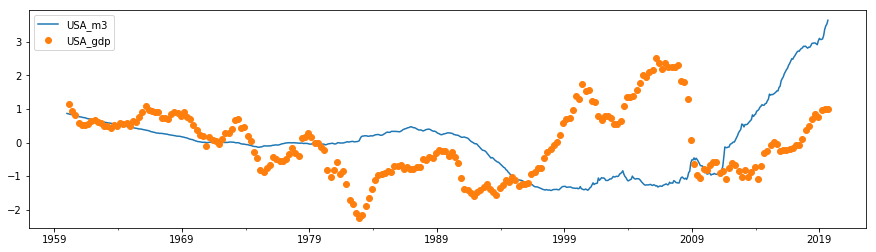

In [19]:
for_pp=pd.concat([month,quart],axis=1)
for_pp[[country+'_m3',country+'_gdp']].plot(figsize=(15,4), style=['-','o'])#.get_figure()
# gdp_yoy = ((1. + (np.log(quart) - np.log(quart.shift(3)))) ** 4) - 1.
# emp_yoy = ((1. + (np.log(month) - np.log(month.shift(1)))) ** 12) - 1.
# df = pd.concat([gdp_yoy, emp_yoy], axis=1)
# df.columns = [country+'_gdp',country+'_m3']
# fig=df[[country+'_gdp',country+'_m3']].plot(figsize=(15,4), style=['o','-'])
# fig.savefig("myplot.png")

In [20]:
# test_m3 (None,12,1)
# test_gdp (None,4,1)
# def 
month_sh=[month[i:i+12] for i in range(0,len(month)-11)]#формируем окна в 12 месяцев
X_m3=np.array(month_sh).reshape((len(month_sh),12,1))[:-1]#отбрасываем окно в последние 12 месяцев, потому что для него
# нет прогнозной точки
y_m3=np.array([month[i+12] for i in range(0,len(month)-12)])#формируем то, что будем предсказывать оканми - следующая дата окна.
# здесь хоть и i+12, но берется 13 точка, то есть след прогнозная
print(X_m3.shape)
y_m3.shape

(705, 12, 1)


(705,)

In [21]:
from datetime import date, timedelta, datetime
from dateutil.relativedelta import relativedelta

def get_first_day(dt, d_years=0, d_months=0):
    y, m = dt.year + d_years, dt.month + d_months
    a, m = divmod(m-1, 12)
    return date(y+a, m+1, 1)

def get_last_day(dt):
    return get_first_day(dt,0,1)+timedelta(-1)

def get_lag(date,month_lag):
    last_d=date+-timedelta(1)#возвращаем последнюю дату данных
    with_lag=last_d-relativedelta(months=month_lag) #отматываем на два квартала назад - отнимаем 5 месяце
    return get_last_day(with_lag)

f_m_q=[1,4,7,10] #1-й месяц квартала: 
s_m_q=[2,5,8,11] #2-й месяц квартала:
t_m_q=[3,6,9,12] #3-й месяц квартала:

#логика лаггирования - преполагаем, что как у росстата с ввп лаг публикации 2 месяца, то есть публикуется квартальное значение 
# индикактора на 3 месяц следующего квартала. Поэтому нужно так: для прогноза 1 и 2 - го мес кваратала t нужно
# предыдущей свертке ставить в соответствие квартал t-2, остальным - как положено, а 3 месяцу - t-1. 
# Сейчас для упрощения 3 месяцу тоже ставится t-2. Из предположения, что мы прогнозируем до 19 числа 3 месяца, то есь до публикации
# квартального значения за предыдцщий период.

def lagged_dates(quart, b): #b - последняя точка с имеющимися данными
    a=b+timedelta(1)# a - это прогнозируемый месяц
    if b.month in f_m_q:#если данные заканчиваются на  1,4,7,10 месяцем, то лаг будет 4
        zx=pd.concat([quart.loc[get_lag(a,11):get_lag(a,4)],# 7 - это минус два квартала
                          quart.loc[get_lag(a,5):get_lag(a,4)]],axis=0)#дубл
    else:
        zx=pd.concat([quart.loc[get_lag(a,12):get_lag(a,5)],# 7 - это минус два квартала
                          quart.loc[get_lag(a,6):get_lag(a,5)]],axis=0)#дублируем значение 2-х лагового квартала 
    return zx

In [22]:
quart_sh=[]
for i in range(0,len(month_sh[:-1])):
    b=month_sh[:-1][i].index[-1]# это точка с последними имеющимися данными
    quart_sh.append(lagged_dates(quart,b).values)
    
quart_sh_ar=np.array(quart_sh[1:])#отбрасываем первый вектор, потому что для него не хватает лага квартала
X_gdp=quart_sh_ar.reshape((len(quart_sh_ar),4,1))
print('итого должна быть такая размерность: {}'.format(X_gdp.shape))

итого должна быть такая размерность: (704, 4, 1)


### Строим нейронку

In [23]:
from numpy import hstack
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Input, Conv1D, Dense, Activation, Dropout, Lambda, Multiply, Add, Concatenate
from keras.layers import Flatten
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping

from keras.utils import plot_model
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


Using TensorFlow backend.


In [24]:
# np.random.seed(42)#для воспроизводимости результатов

# X_cnn_train=np.random.random_sample((50000,12, 1))
# X_cnn_test=np.random.random_sample((1000,12, 1))

# invest_train=np.random.random_sample((50000,4,1))
# invest_test=np.random.random_sample((1000,4,1))

# y_cnn_train=np.random.random_sample(50000)
# Y_cnn_test=np.random.random_sample(1000)

n=650
X_cnn_train=X_m3[1:][:n]
X_cnn_test=X_m3[1:][n:]

invest_train=X_gdp[:n]
invest_test=X_gdp[n:]

y_cnn_train=y_m3[1:][:n]
Y_cnn_test=y_m3[1:][n:]

n_steps=12

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
monthly (InputLayer)            (None, 12, 1)        0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 4, 25)        100         monthly[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 4, 25)        0           conv1d_1[0][0]                   
_______________________________________________

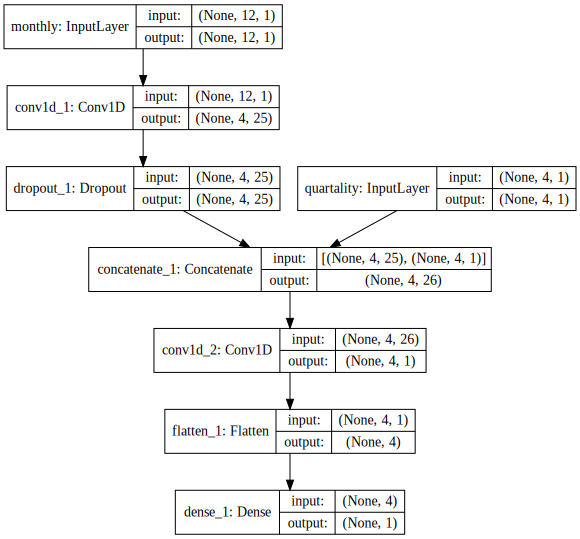

In [25]:
#1-d свертка всегда сворачивает всю панель фаткоров в одно наблюдение.

n_features = X_cnn_train.shape[2]

visible = Input(shape=(n_steps, n_features),name='monthly')
cnn = Conv1D(filters=25, kernel_size=3, 
#               padding='causal',
#               dilation_rate=4,
              strides=3,
              activation='linear')(visible)
#чтоб не смешивать ряды между собой заранее нужно отдельный инпут тогда для каждого 
cnn = Dropout(0.3)(cnn)

inv_inp = Input(shape=(4, 1),name='quartality')

z = concatenate([cnn,inv_inp],axis=-1)

merge = Conv1D(filters=1, kernel_size=1, activation='linear')(z)
merge = Flatten()(merge)
output = Dense(1, activation='linear')(merge)
model = Model(inputs=[visible,inv_inp], outputs=output)
model.summary()


SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))
# from keras.utils import plot_model
# plot_model(model, show_shapes=True, to_file='network2.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
monthly (InputLayer)            (None, 12, 1)        0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 11, 25)       75          monthly[0][0]                    
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 4, 1)         51          conv1d_3[0][0]                   
__________________________________________________________________________________________________
quartality (InputLayer)         (None, 4, 1)         0                                            
__________________________________________________________________________________________________
concatenat

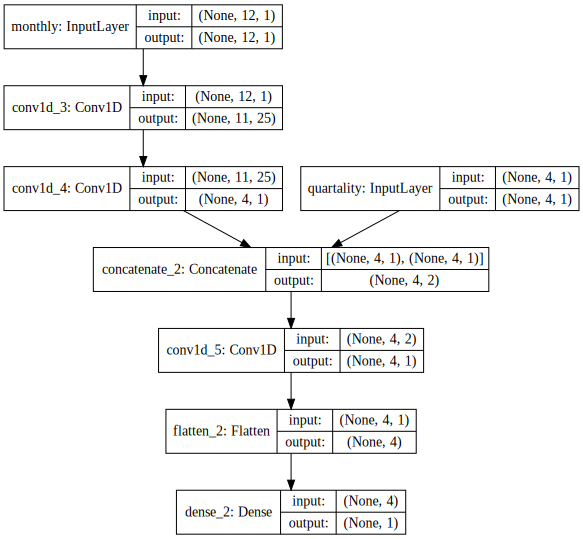

In [36]:
#1-d свертка всегда сворачивает всю панель фаткоров в одно наблюдение.

n_features = X_cnn_train.shape[2]

visible = Input(shape=(n_steps, n_features),name='monthly')
cnn = Conv1D(filters=25, kernel_size=2, 
              activation='linear')(visible)

# cnn = Dropout(0.3)(cnn)

cnn = Conv1D(filters=1, kernel_size=2, 
              strides=3,
              activation='linear')(cnn)
# 
# cnn = Dropout(0.3)(cnn)
#чтоб не смешивать ряды между собой заранее нужно отдельный инпут тогда для каждого 

inv_inp = Input(shape=(4, 1),name='quartality')

z = concatenate([cnn,inv_inp],axis=-1)

merge = Conv1D(filters=1, kernel_size=1, activation='linear')(z)
merge = Flatten()(merge)
output = Dense(1, activation='linear')(merge)
model = Model(inputs=[visible,inv_inp], outputs=output)
model.summary()

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))


In [40]:
n=650
X_cnn_train=X_m3[1:][:n]
X_cnn_test=X_m3[1:][n:]

# invest_train=X_gdp[:n]
# invest_test=X_gdp[n:]

y_cnn_train=y_m3[1:][:n]
Y_cnn_test=y_m3[1:][n:]

n_steps=12

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
monthly (InputLayer)         (None, 12, 1)             0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 11, 25)            75        
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 4, 1)              51        
_________________________________________________________________
flatten_4 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


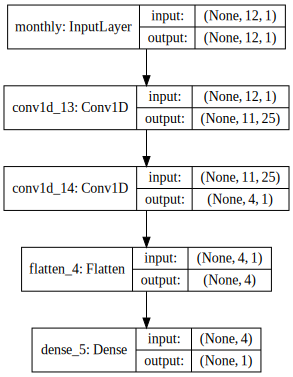

In [46]:
#1-d свертка всегда сворачивает всю панель фаткоров в одно наблюдение.

n_features = X_cnn_train.shape[2]

visible = Input(shape=(n_steps, n_features),name='monthly')
cnn = Conv1D(filters=25, kernel_size=2, 
              activation='linear')(visible)

# cnn = Dropout(0.3)(cnn)

cnn = Conv1D(filters=1, kernel_size=2, 
              strides=3,
              activation='linear')(cnn)
# 
# cnn = Dropout(0.3)(cnn)
#чтоб не смешивать ряды между собой заранее нужно отдельный инпут тогда для каждого 

# inv_inp = Input(shape=(4, 1),name='quartality')

# z = concatenate([cnn,inv_inp],axis=-1)

# merge = Conv1D(filters=1, kernel_size=1, activation='linear')(cnn)
merge = Flatten()(cnn)
output = Dense(1, activation='linear')(merge)
model = Model(inputs=[visible], outputs=output)
model.summary()

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [47]:
# opt = Nadam(lr=0.01)
model.compile(optimizer= Adam(), 
              loss='mean_squared_error')

history = model.fit(X_cnn_train, y_cnn_train, 
          epochs = 300, 
          batch_size = 10000, 
          verbose=0, 
          validation_data=(X_cnn_test, Y_cnn_test),
          shuffle=False)

Последняя ошибка на валидации: 0.139524906873703


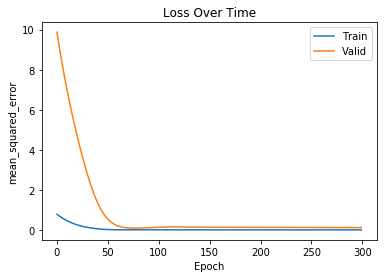

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('mean_squared_error')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

print('Последняя ошибка на валидации: {}'.format(history.history['val_loss'][-1]))

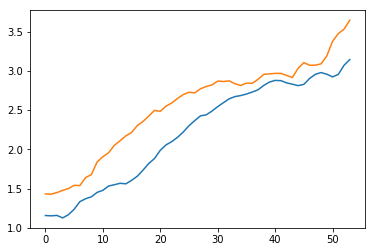

In [50]:
plt.plot(model.predict([X_cnn_test]))
plt.plot(Y_cnn_test)

Последняя ошибка на валидации: 0.017641250044107437


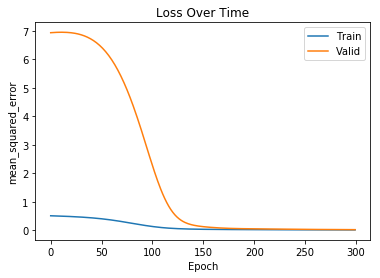

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('mean_squared_error')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

print('Последняя ошибка на валидации: {}'.format(history.history['val_loss'][-1]))

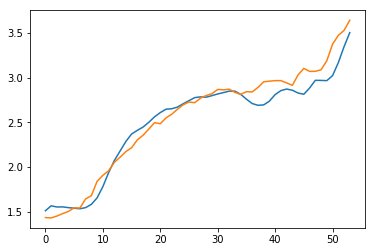

In [39]:
plt.plot(model.predict([X_cnn_test,invest_test]))
plt.plot(Y_cnn_test)

### сохраненная

In [436]:
model_json=model.to_json()
json_file=open('best_full_model.json','w')
json_file.write(model_json)
json_file.close()
model.save_weights("best_full_model.h5")

In [437]:
from keras.models import model_from_json
print("Загружаю сеть из файлов")
# Загружаем данные об архитектуре сети
json_file = open("best_full_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
# Создаем модель
loaded_model = model_from_json(loaded_model_json)
# Загружаем сохраненные веса в модель
loaded_model.load_weights("best_full_model.h5")
print("Загрузка сети завершена")

Загружаю сеть из файлов
Загрузка сети завершена


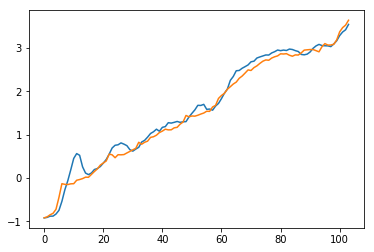

In [438]:
plt.plot(loaded_model.predict([X_cnn_test,invest_test]))
plt.plot(Y_cnn_test)